## Business Problem
Customer churn leads to revenue loss and increased acquisition costs.
The goal of this project is to predict whether a customer is likely to churn
based on demographic, behavioral, and service-related data.

## Project Objective
Build a machine learning classification model that predicts
whether a customer will churn based on historical customer data.

## Target Variable
Churn (Yes / No)

## Input Features
Demographic, financial, and service usage attributes of customers
such as tenure, charges, contract type, and payment method.

## Evaluation Metrics
The model will be evaluated using Accuracy, Precision, Recall,
and Confusion Matrix to measure its performance in predicting churn.

## Modeling Approach
We will start with Logistic Regression as a baseline model
and later experiment with Decision Tree and Random Forest classifiers.

## Project Workflow
1. Business Understanding
2. Data Loading & Inspection
3. Data Cleaning & Preprocessing
4. Exploratory Data Analysis (EDA)
5. Feature Engineering
6. Model Training
7. Model Evaluation
8. Business Insights & Recommendations

## Importing Required Libraries

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## Data Loading

In this step, we load the customer churn dataset into a Pandas
DataFrame for further analysis and preprocessing.

In [3]:
df = pd.read_csv("Customer Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Initial Data Inspection

We examine the structure of the dataset to understand the number
of rows and columns, data types, and presence of missing values.

In [4]:
#Shape 
df.shape

(7043, 21)

In [5]:
#Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [7]:
#Check for null values
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

## Dataset Overview

Each row represents a customer.
The dataset contains demographic, billing, and service usage information.

The target variable is **Churn**, which indicates whether a customer
has left the service.

## Target Variable Analysis

The target variable **Churn** indicates whether a customer has
left the service. We analyze its distribution to understand
class balance.

In [8]:
df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

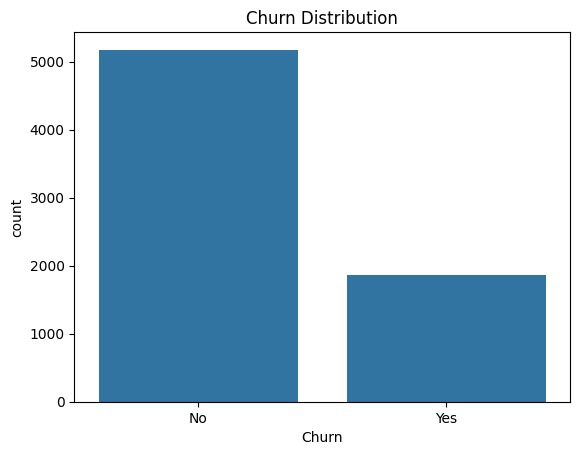

In [9]:
sns.countplot(x='Churn', data=df)
plt.title("Churn Distribution")
plt.show()

## Data Cleaning

The `TotalCharges` column is converted to numeric format,
and missing values are handled using the median.

In [10]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())

In [11]:
df.isnull().sum()


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

## Exploratory Data Analysis (EDA)

EDA helps identify patterns and relationships
between customer attributes and churn.


## Churn Distribution


C:\Users\Annie Valentina\AppData\Local\Temp\ipykernel_22472\1513126770.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


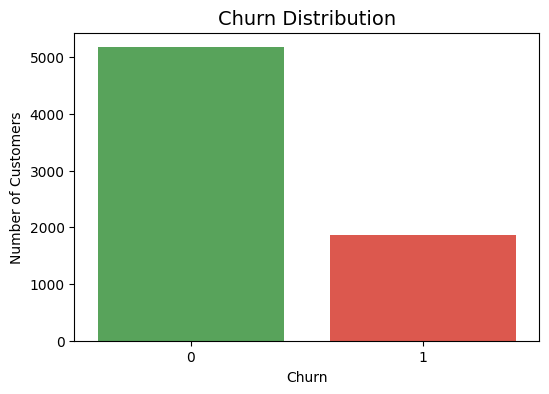

In [30]:
plt.figure(figsize=(6,4))
sns.countplot(
    x='Churn',
    data=df,
    palette=['#4CAF50', '#F44336']
)
plt.title("Churn Distribution", fontsize=14)
plt.xlabel("Churn")
plt.ylabel("Number of Customers")
plt.show()


## Contract Type vs Churn


C:\Users\Annie Valentina\AppData\Local\Temp\ipykernel_22472\195357441.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


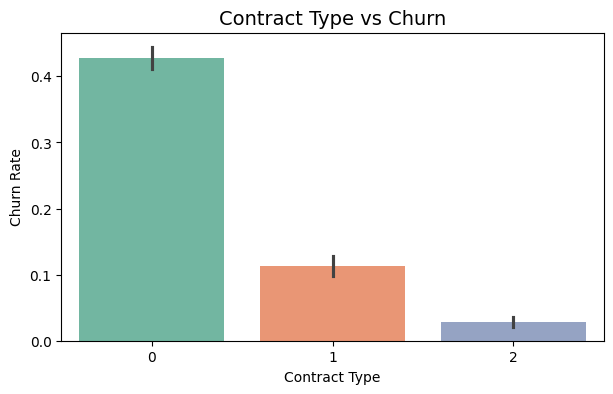

In [31]:
plt.figure(figsize=(7,4))
sns.barplot(
    x='Contract',
    y='Churn',
    data=df,
    palette='Set2'
)
plt.title("Contract Type vs Churn", fontsize=14)
plt.xlabel("Contract Type")
plt.ylabel("Churn Rate")
plt.show()


## Tenure vs Churn


C:\Users\Annie Valentina\AppData\Local\Temp\ipykernel_22472\1896260331.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


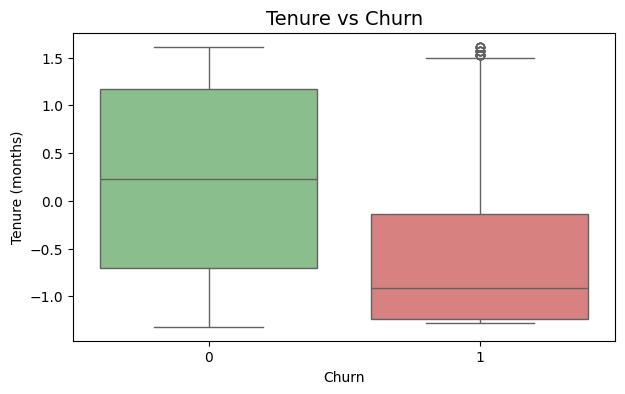

In [32]:
plt.figure(figsize=(7,4))
sns.boxplot(
    x='Churn',
    y='tenure',
    data=df,
    palette=['#81C784', '#E57373']
)
plt.title("Tenure vs Churn", fontsize=14)
plt.xlabel("Churn")
plt.ylabel("Tenure (months)")
plt.show()


## Monthly Charges vs Churn


C:\Users\Annie Valentina\AppData\Local\Temp\ipykernel_22472\1563899781.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


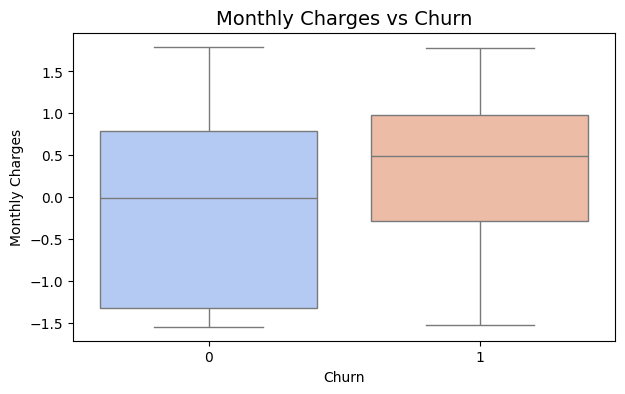

In [33]:
plt.figure(figsize=(7,4))
sns.boxplot(
    x='Churn',
    y='MonthlyCharges',
    data=df,
    palette='coolwarm'
)
plt.title("Monthly Charges vs Churn", fontsize=14)
plt.xlabel("Churn")
plt.ylabel("Monthly Charges")
plt.show()


## Tenure Distribution by Churn


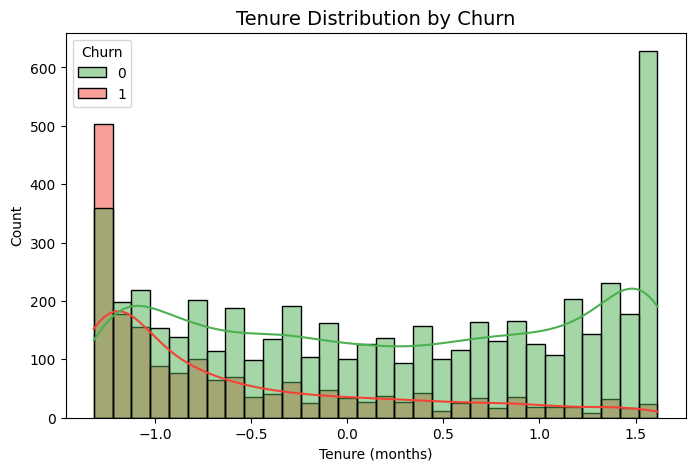

In [34]:
plt.figure(figsize=(8,5))
sns.histplot(
    data=df,
    x='tenure',
    hue='Churn',
    bins=30,
    kde=True,
    palette=['#4CAF50', '#F44336']
)
plt.title("Tenure Distribution by Churn", fontsize=14)
plt.xlabel("Tenure (months)")
plt.ylabel("Count")
plt.show()


## Monthly Charges Distribution by Churn


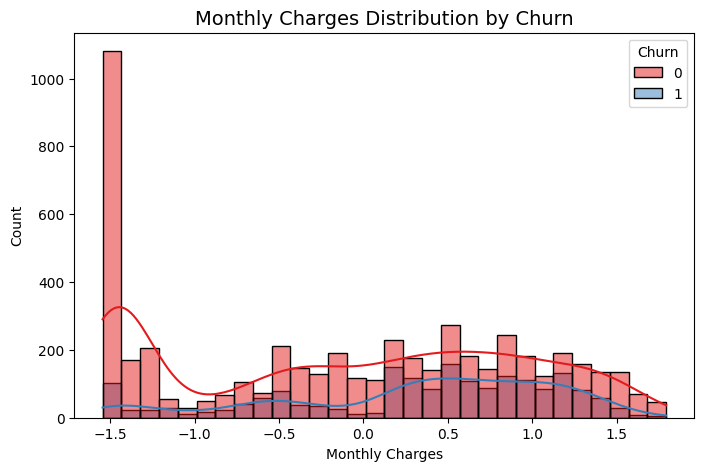

In [35]:
plt.figure(figsize=(8,5))
sns.histplot(
    data=df,
    x='MonthlyCharges',
    hue='Churn',
    bins=30,
    kde=True,
    palette='Set1'
)
plt.title("Monthly Charges Distribution by Churn", fontsize=14)
plt.xlabel("Monthly Charges")
plt.ylabel("Count")
plt.show()


## Senior Citizen vs Churn


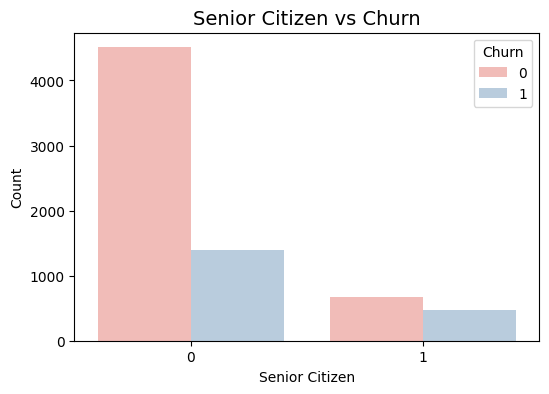

In [36]:
plt.figure(figsize=(6,4))
sns.countplot(
    x='SeniorCitizen',
    hue='Churn',
    data=df,
    palette='Pastel1'
)
plt.title("Senior Citizen vs Churn", fontsize=14)
plt.xlabel("Senior Citizen")
plt.ylabel("Count")
plt.show()


## Payment Method vs Churn


C:\Users\Annie Valentina\AppData\Local\Temp\ipykernel_22472\2775396301.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


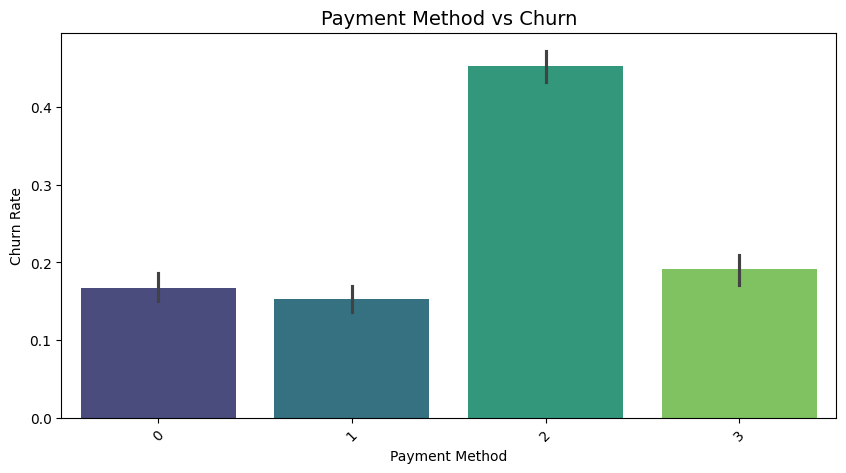

In [37]:
plt.figure(figsize=(10,5))
sns.barplot(
    x='PaymentMethod',
    y='Churn',
    data=df,
    palette='viridis'
)
plt.title("Payment Method vs Churn", fontsize=14)
plt.xlabel("Payment Method")
plt.ylabel("Churn Rate")
plt.xticks(rotation=45)
plt.show()


## Correlation Analysis


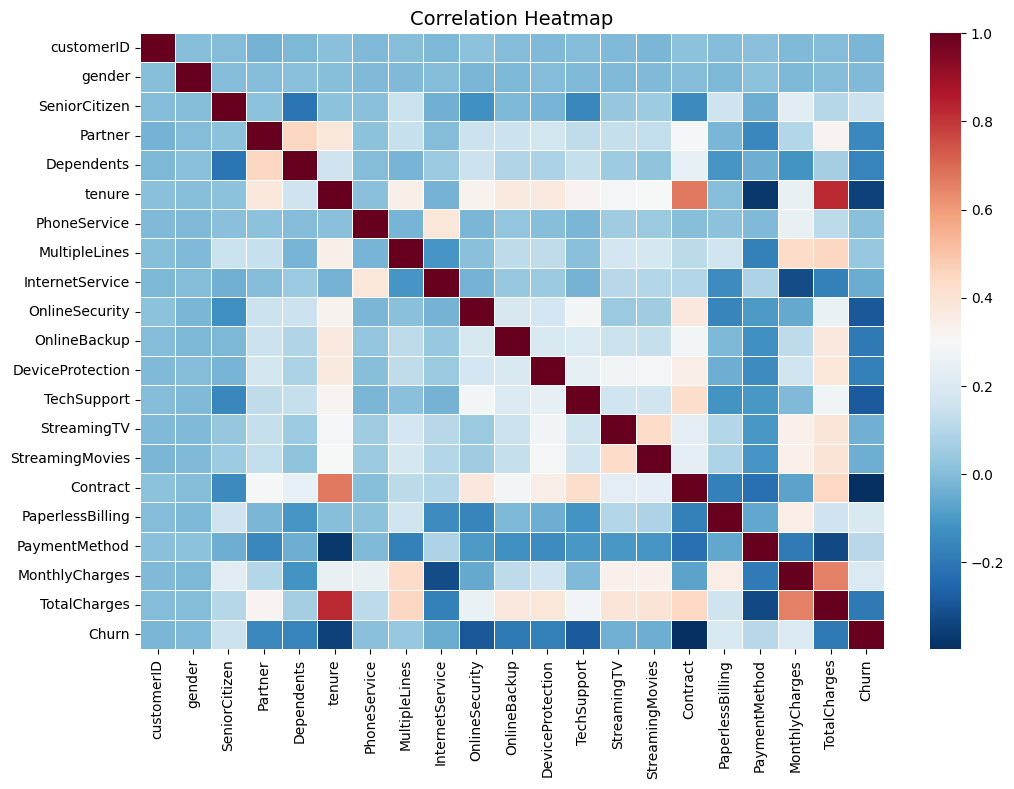

In [38]:
plt.figure(figsize=(12,8))
sns.heatmap(
    df.corr(),
    cmap='RdBu_r',
    annot=False,
    linewidths=0.5
)
plt.title("Correlation Heatmap", fontsize=14)
plt.show()


## Encoding Categorical Variables

Categorical columns are converted into numerical format
to make the dataset compatible with machine learning models.

In [15]:
le = LabelEncoder()

for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])

## Feature Scaling

Numerical features are scaled to ensure
all features contribute equally to the model.

In [16]:
scaler = StandardScaler()

num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
df[num_cols] = scaler.fit_transform(df[num_cols])

## Train-Test Split

The dataset is split into training and testing sets
to evaluate model performance on unseen data.

In [17]:
X = df.drop('Churn', axis=1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

## Logistic Regression Model 

Logistic Regression is used as the baseline
classification model for churn prediction.

In [18]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

C:\Users\Annie Valentina\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


## Logistic Regression Evaluation

The model is evaluated using accuracy,
precision, recall, and confusion matrix.

In [19]:
y_pred = model.predict(X_test)

accuracy_score(y_test, y_pred)


0.8161816891412349

In [20]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.68      0.58      0.62       373

    accuracy                           0.82      1409
   macro avg       0.77      0.74      0.75      1409
weighted avg       0.81      0.82      0.81      1409



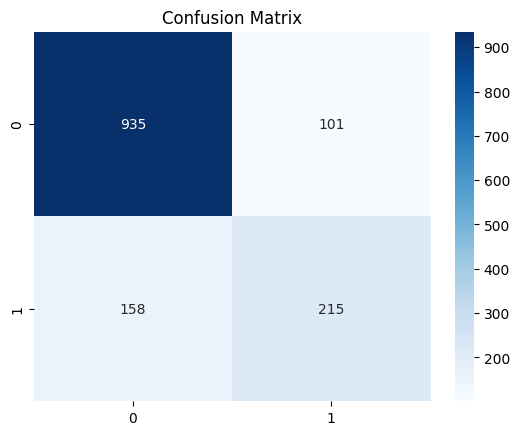

In [21]:
sns.heatmap(confusion_matrix(y_test, y_pred),
            annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.show()


## Random Forest Model Training


In [39]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42
)

rf_model.fit(X_train, y_train)


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


## Random Forest Model Evaluation


In [40]:
rf_pred = rf_model.predict(X_test)

print(classification_report(y_test, rf_pred))


              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1036
           1       0.65      0.49      0.56       373

    accuracy                           0.80      1409
   macro avg       0.74      0.70      0.71      1409
weighted avg       0.78      0.80      0.79      1409



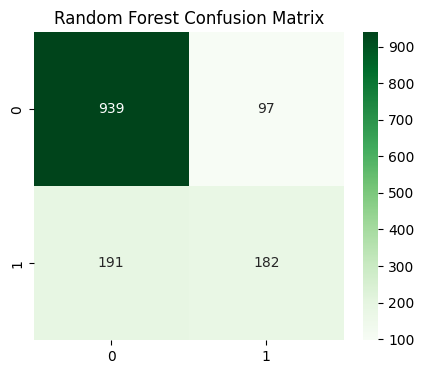

In [41]:
plt.figure(figsize=(5,4))
sns.heatmap(
    confusion_matrix(y_test, rf_pred),
    annot=True,
    fmt='d',
    cmap='Greens'
)
plt.title("Random Forest Confusion Matrix")
plt.show()


## Model Comparison


In [42]:
comparison = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest'],
    'Accuracy': [
        accuracy_score(y_test, y_pred),
        accuracy_score(y_test, rf_pred)
    ]
})

comparison


,Model,Accuracy
0,Logistic Regression,0.816182
1,Random Forest,0.795600


## ROC-AUC Curve


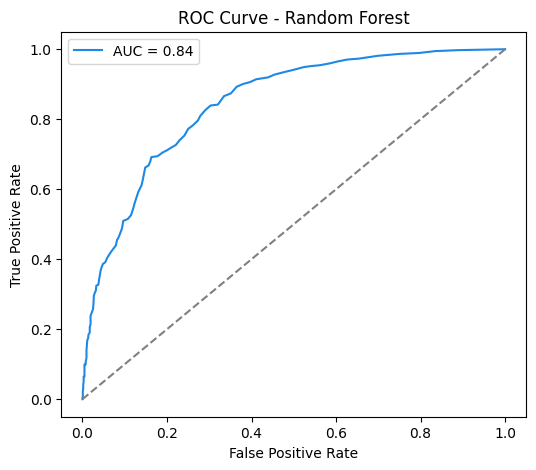

In [43]:
from sklearn.metrics import roc_curve, auc

rf_prob = rf_model.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, rf_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, color='#1E88E5', label=f'AUC = {roc_auc:.2f}')
plt.plot([0,1], [0,1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest")
plt.legend()
plt.show()


## Feature Importance

We analyze which features have the greatest
influence on customer churn.


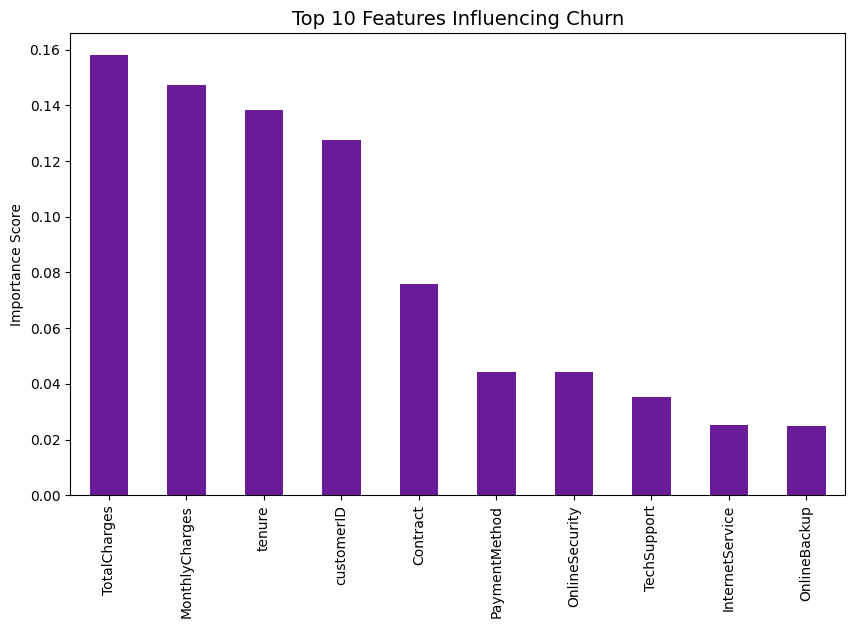

In [44]:
importances = pd.Series(
    rf_model.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

plt.figure(figsize=(10,6))
importances.head(10).plot(
    kind='bar',
    color='#6A1B9A'
)
plt.title("Top 10 Features Influencing Churn", fontsize=14)
plt.ylabel("Importance Score")
plt.show()


## Business Insights and Recommendations

1. Customers with month-to-month contracts are more likely to churn.
2. Customers with low tenure show higher churn risk.
3. Higher monthly charges are associated with increased churn.
4. Long-term contracts significantly reduce churn probability.
5. Retention strategies should focus on early-stage customers.


## Final Conclusion

In this project, a complete end-to-end customer churn analysis was performed using
telecom customer data to identify patterns that influence customer attrition.
The dataset was carefully cleaned, explored, and prepared for machine learning
by handling missing values, encoding categorical variables, and scaling numerical features.

Exploratory Data Analysis revealed that customers with shorter tenure, higher monthly
charges, and month-to-month contracts are significantly more likely to churn.
Service-related features and payment methods also showed noticeable influence on
customer churn behavior.

A baseline Logistic Regression model was initially built to establish a reference
performance. To enhance predictive capability, a Random Forest classifier was trained,
which demonstrated improved performance in identifying churned customers.
Model evaluation using accuracy, precision, recall, confusion matrix, and ROC-AUC
confirmed that the Random Forest model provides better overall churn detection.

Feature importance analysis highlighted key churn drivers such as tenure, contract type,
monthly charges, and service usage attributes. These insights can help businesses
identify high-risk customers early and design targeted retention strategies.

Overall, this project demonstrates how data-driven analysis and machine learning
can be effectively used to predict customer churn and support proactive decision-making
to improve customer retention and reduce revenue loss.
